In [1]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 56.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [2]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Data

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Spotify/Spotify_API_csv/SpotifyAPI_Jazz.csv')
#print(data)

# Train Test Split
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_train.shape)

# Neural Network

In [4]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
250/250 [==============================] - 10s 6ms/step - loss: 0.0995 - accuracy: 0.9656 - precision: 0.0286 - recall: 0.0041   
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0758 - accuracy: 0.9706 - precision: 0.5593 - recall: 0.1364
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0677 - accuracy: 0.9724 - precision: 0.5929 - recall: 0.2769
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0637 - accuracy: 0.9736 - precision: 0.6348 - recall: 0.3017
Epoch 5/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0588 - accuracy: 0.9751 - precision: 0.6335 - recall: 0.4215
Epoch 6/50
250/250 [==============================] - 2s 6ms/step - loss: 0.0529 - accuracy: 0.9772 - precision: 0.6899 - recall: 0.4504
Epoch 7/50
250/250 [==============================] - 1s 6ms/step - loss: 0.0483 - accuracy: 0.9796 - precision: 0.6946 - recall: 0.5826
Epoch 8/50
250/250 [=================

# Perforomance + Plot Graph 

In [5]:
predictions = model.predict(X_test_scaled)

prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

print(confusion_matrix(y_test, prediction_classes))

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.4f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.4f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.4f}')

63/63 [==============================] - 0s 2ms/step
[[1886   35]
 [  37   42]]
Accuracy: 0.9640
Precision: 0.5455
Recall: 0.5316


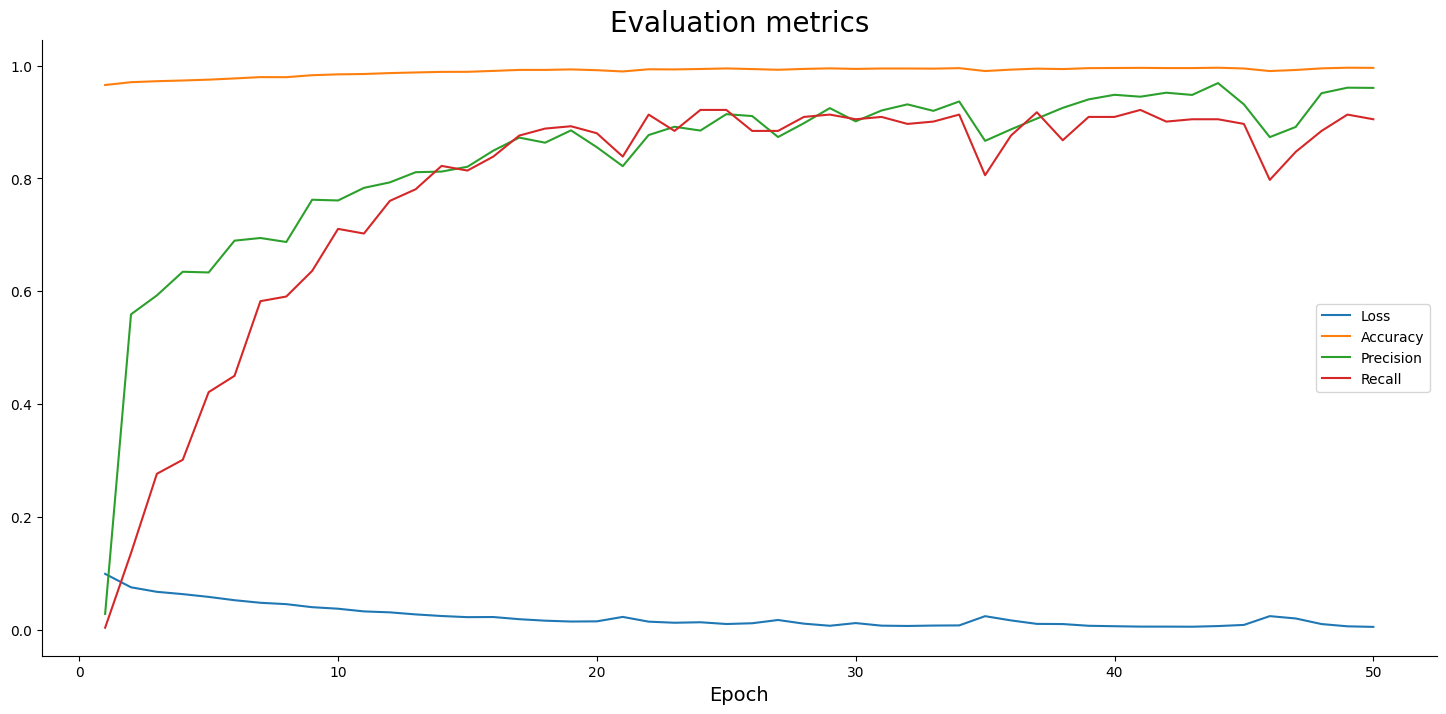

In [6]:
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

# Old

In [7]:
!pip install keras --upgrade
!pip install pandas --upgrade
!pip install tensorflow --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import sklearn as sk
from sklearn import model_selection
data = pd.read_csv('/content/drive/MyDrive/Spotify/SpotifyAPI_Jazz.csv')
print(data)

FileNotFoundError: ignored

In [ ]:
train, test = sk.model_selection.train_test_split(data, test_size=0.2)

In [ ]:
X_train = train.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
X_test = test.drop(['hit', 'name','artist', 'Unnamed: 0'], axis = 1)
y_train = train['hit']
y_test = test['hit']

In [ ]:
print(X_train.shape)

In [ ]:
#X_train = np.asarray(X_train).astype('float32').reshape((-1,1))
#X_test = np.asarray(X_test).astype('float32').reshape((-1,1))
#y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
#y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(lr=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=50)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

In [ ]:
import numpy as np
plt.plot(
    np.arange(1, 51), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 51), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 51), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 51), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
predictions = model.predict(X_test_scaled)


In [ ]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, prediction_classes))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')